# 6 Background and Facilities

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as utils

In [14]:
df = pd.read_feather("./data/cleaned_parental_origin")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu

## 6.1 Parental Origin and Facilities

In [15]:
df["Parental_Origin"].value_counts()

Parental_Origin
All Native      2501
All Foreign      771
At least One     570
NA                33
Name: count, dtype: int64

### 6.1.1 Parental Origin and Facilities  - Individual

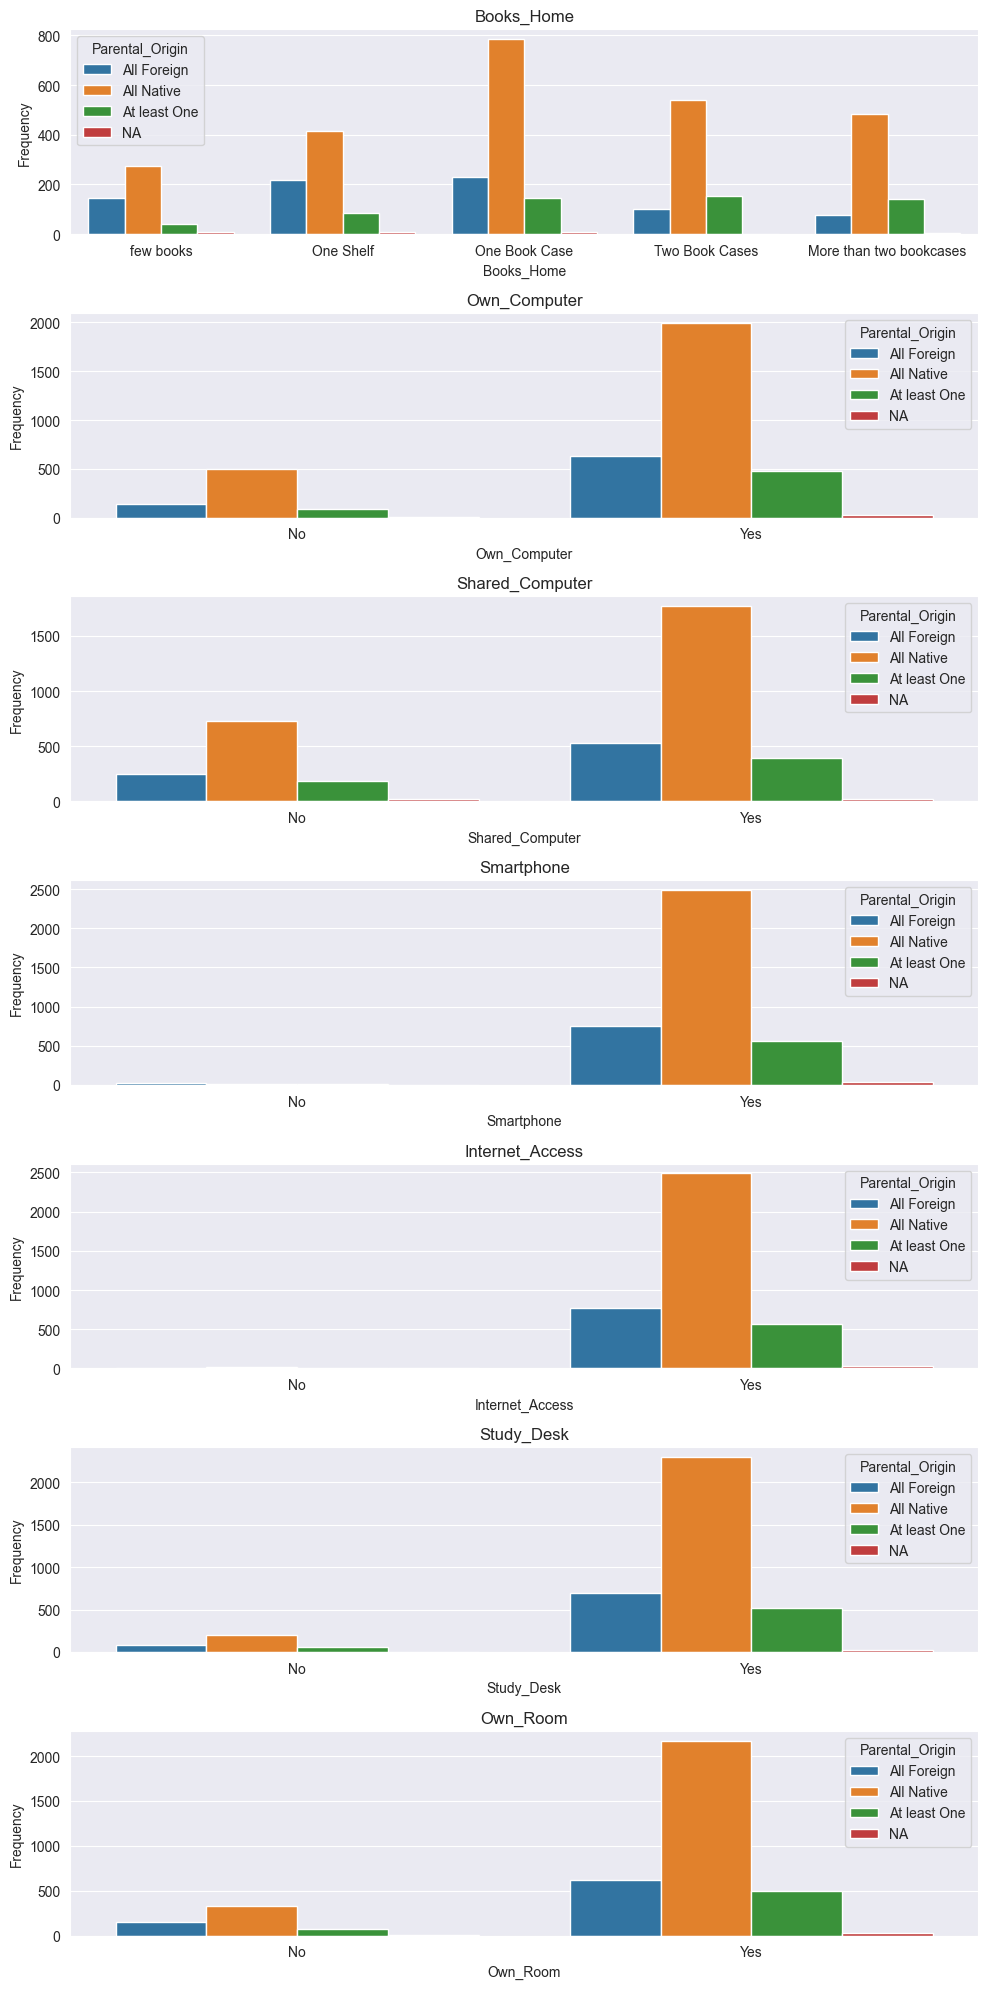

In [16]:
utils.distributionOfFacilities(df,"Parental_Origin")

### 6.1.2 Parental Origins and Best living conditions

#### 6.1.2.1 Parental Origins and Best living conditions -Overall

In [17]:
studentsOwnComp = df["Own_Computer"].str.contains("Yes")
studentsHaveInternet = df["Internet_Access"].str.contains("Yes")
studentsHaveSharedComputer = df["Shared_Computer"].str.contains("Yes")
studentsHaveDesk = df["Study_Desk"].str.contains("Yes")
studentsHaveOwnRoom = df["Own_Room"].str.contains("Yes")
studentsHaveBooks = df["Books_Home"] >= "One Shelf"


filtered = df[studentsHaveOwnRoom & studentsHaveBooks & studentsHaveDesk & studentsOwnComp & studentsHaveInternet]
origin_group = filtered.groupby("Parental_Origin")
origin_group["Parental_Origin"].describe()



,count,unique,top,freq
Parental_Origin,,,,
All Foreign,418,1,All Foreign,418
All Native,1478,1,All Native,1478
At least One,370,1,At least One,370
NA,16,1,NA,16


### 6.1.2.2 Parental Origins and Best living conditions - Percentage

##### 6.1.2.2.1 Parental Origins and Best living conditions - Percentage among best living conditions

In [18]:
percentage_among_best_living = origin_group.size() / filtered["Parental_Origin"].count() * 100

print(percentage_among_best_living )

Parental_Origin
All Foreign     18.317266
All Native      64.767748
At least One    16.213848
NA               0.701139
dtype: float64


##### 6.1.2.2.2 Parental Origins and Best living conditions - Percentage of best living per origin among the total dstribution

In [19]:
percentage_of_best_living_among_all = origin_group.size() / df["Parental_Origin"].count() * 100
percentage_of_best_living_among_all

Parental_Origin
All Foreign     10.787097
All Native      38.141935
At least One     9.548387
NA               0.412903
dtype: float64

## 6.2 Parental Education and Facilities

In [20]:
df["highest"].value_counts()

highest
Not Available      1181
Postgraduate        960
Tertiary            775
Undergraduate       418
Upper Secondary     393
Primary             148
Name: count, dtype: int64

### 6.1.1 Parental Education and Facilities  - Individual

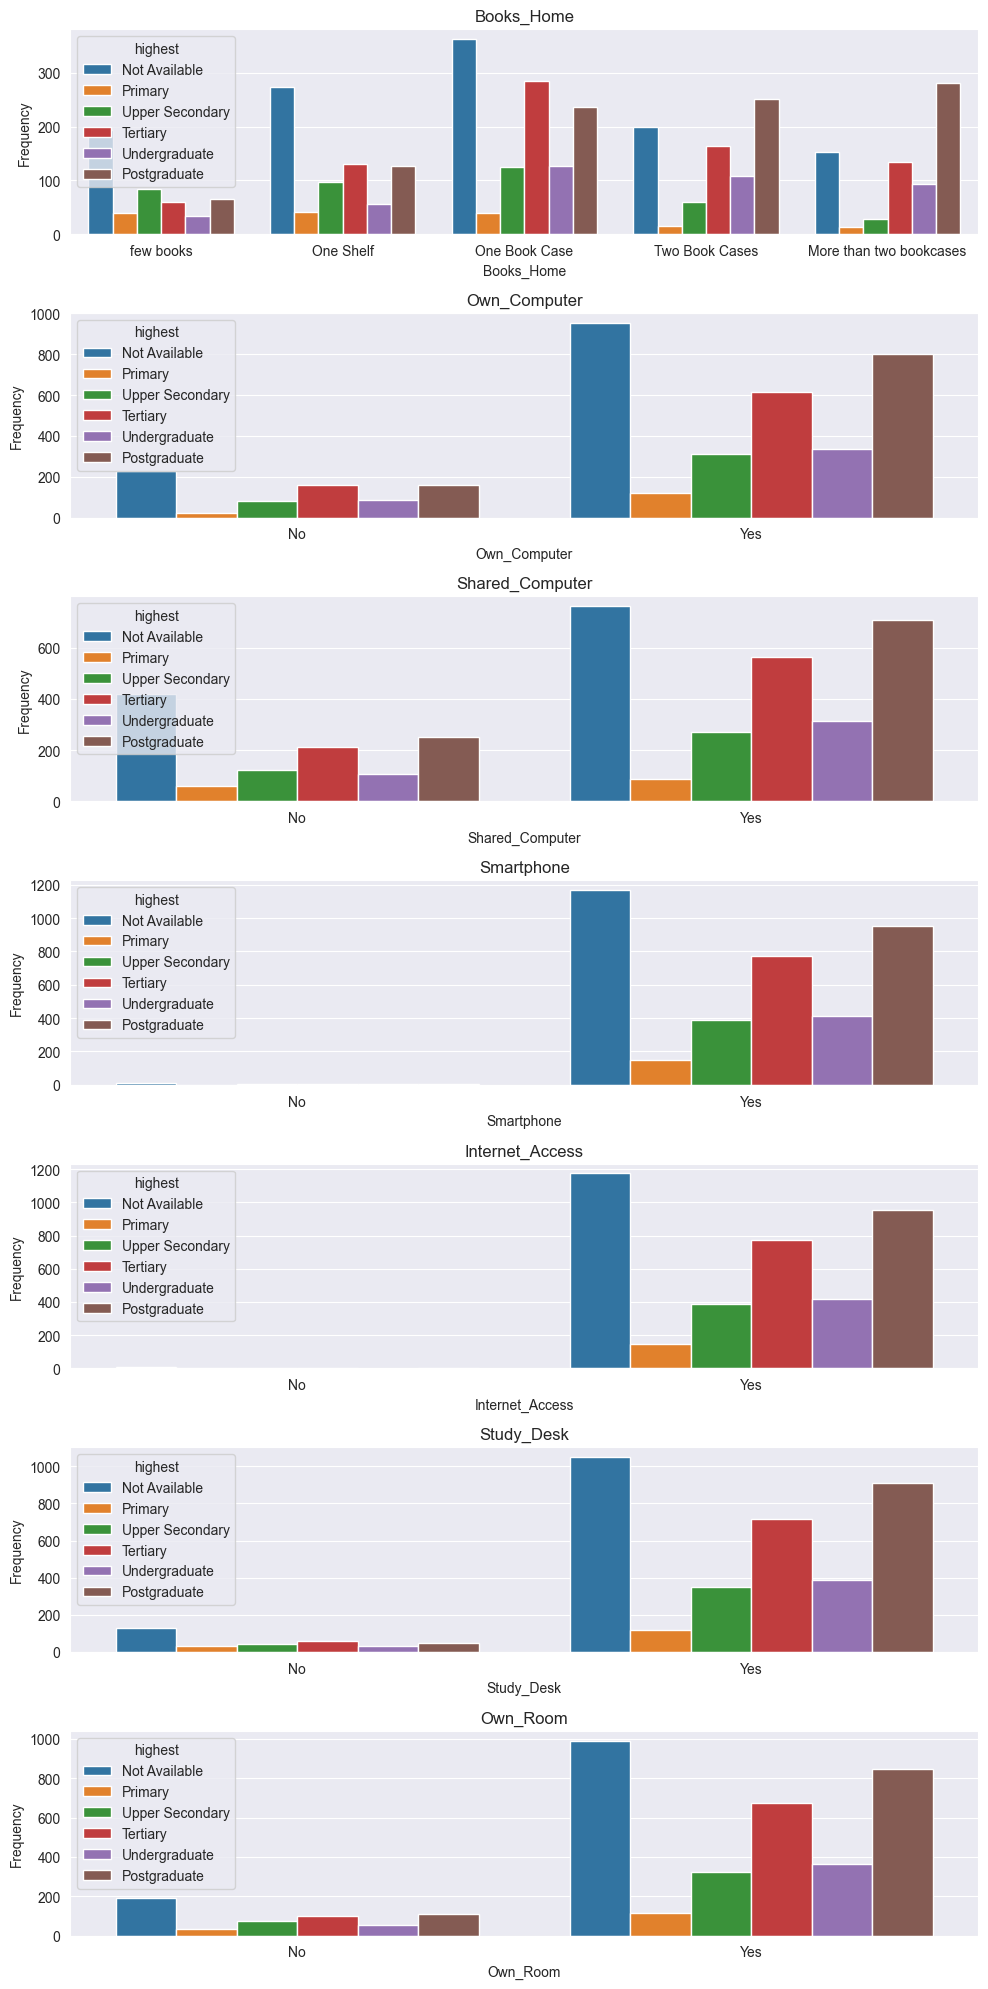

In [21]:
utils.distributionOfFacilities(df,"highest")

### 6.1.2 Parental Education and Best living conditions

#### 6.1.2.1 Parental Education and Best living conditions -Overall

In [22]:
studentsOwnComp = df["Own_Computer"].str.contains("Yes")
studentsHaveInternet = df["Internet_Access"].str.contains("Yes")
studentsHaveSharedComputer = df["Shared_Computer"].str.contains("Yes")
studentsHaveDesk = df["Study_Desk"].str.contains("Yes")
studentsHaveOwnRoom = df["Own_Room"].str.contains("Yes")
studentsHaveBooks = df["Books_Home"] >= "One Shelf"


filtered = df[studentsHaveOwnRoom & studentsHaveBooks & studentsHaveDesk & studentsOwnComp & studentsHaveInternet]
origin_group = filtered.groupby("highest",observed=False)
origin_group["highest"].describe()



,count,unique,top,freq
highest,,,,
Not Available,649,1,Not Available,649
Primary,62,1,Primary,62
Upper Secondary,183,1,Upper Secondary,183
Tertiary,475,1,Tertiary,475
Undergraduate,269,1,Undergraduate,269
Postgraduate,644,1,Postgraduate,644


### 6.1.2.2 Parental Education and Best living conditions - Percentage

##### 6.1.2.2.1 Parental Education and Best living conditions - Percentage among best living conditions

In [23]:
percentage_among_best_living = origin_group.size() / filtered["highest"].count() * 100

print(percentage_among_best_living )

highest
Not Available      28.439965
Primary             2.716915
Upper Secondary     8.019281
Tertiary           20.815074
Undergraduate      11.787905
Postgraduate       28.220859
dtype: float64


##### 6.1.2.2.2 Parental Education and Best living conditions - Percentage of best living per origin among the total dstribution

In [24]:
percentage_of_best_living_among_all = origin_group.size() / df["highest"].count() * 100
percentage_of_best_living_among_all

highest
Not Available      16.748387
Primary             1.600000
Upper Secondary     4.722581
Tertiary           12.258065
Undergraduate       6.941935
Postgraduate       16.619355
dtype: float64